# Lab 2:   JWST Zeropoints!  
              
**Objectives** In this lab, we will work with JWST catalog data. As part of this work, we will use some interactive features of jupyter notebooks and write a script which can then be imported into the notebook environment.


## A True Story

The James Webb Space Telescope (JWST) was launched in December 2021.   After arriving in its L2 orbit and going through a series of commissioning steps, the first science data was taken in June/July 2022.    These data were released to the "Early Science Release (ERS)" teams in mid-July.   The understanding was that the data were fairly well calibrated, but had some associated risk and had not yet been fully vetted.

In August 2022, the [Stellar Population ERS](https://ers-stars.github.io/) team gathered at STScI for a 2-day hackathon to tackle early science projects.    In advance of this meeting, a preliminary photometric catalog was produced for the globular cluster M92.   Excited to begin work, we plotted the CMD and saw something... funny.  It appeared that the data were not properly calibrated-- specifically that there seemed to be magnitude offsets in each CCD chip.   This was worrisome, since a handful of high profile science results had already been published.   As we dug deeper, we realized that indeed the photometric zeropoints in the JWST pipeline were pretty wrong.   Here is a nice write-up on [why JWST zeropoints matters](https://www.nature.com/articles/d41586-022-03059-y).

This lab will walk you through the JWST ERS data and calcalate zeropoint offsets.  This work is based on [Boyer et al 2022](https://ui.adsabs.harvard.edu/abs/2022RNAAS...6..191B/abstract).

## JWST NIRCAM

NIRCAM is one of several instruments on JWST.   It is an near infrared imager, consisting of several set of detectors.   We will focus on the 'short wavelength' (SW) channels taken in two near IR bands (F090W and F150W).    Take a moment to read about the JWST NIRCAM instrument:  https://jwst-docs.stsci.edu/jwst-near-infrared-camera


## The Globular Cluster M92

We will be working with data of the Milky Way globular cluster M92.   Globular clusters are broadly assumed to have a single stellar population, but looking more closely this isn't always true.

To get started, write a one sentence expectation for what the color-magnitude diagram (CMD) of an 'ideal' globular cluster should look like.  Can you come up with one or more ideas how reality might deviate from this?   That is, what physical process or processes (not related to the observer) could modify the CMD of a globular cluster?

####  Your expectation of globular cluster CMDs and ideas for modifying this expectation
Globular clusters usually contain stars formed at the same time, meaning they share the same age. 
They are also usually old, especially those orbiting their host galaxy as that implies the cluster was formed prior to the galaxy (stars are not collisional and therefore clusters cannot fall into galaxy disk during galaxy formation). The CMD might have a long main sequence (since clusters are old, massive stars should have supernoaved by now) with a turnoff point indicating the cluster age. Perhaps the CMD would look different if the cluster underwent a second star formation burst, giving the cluster multiple stellar population ages.

## A Note on Python Imports
I have a short set of imports that I copy into every new notebook.   I'll then add other imports as needed for each specific notebook.


In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from astropy.table import Table
from astropy.io import ascii

# Part I:   Data Wrangling

The data for this Lab can be downloaded from Canvas.  The data are based on PSF-photometry done by Jay Anderson (STScI) on JWST data taken of the globular cluster M92.   The images were reduced with a early version (July 2022) of the JWST pipeline.  There are two data files:

`MATCHUP.XYMEEE.F090W`:  Photometry for M92 in the F090W band 

`MATCHUP.XYMEEE.F150W`:  Photometry for M92 in the F150W band 

The order of stars in each file is identical.   The column names in each file are:

- `xbar`/`ybar`:  The x/y position of the star on the detector
- `mbar`:         The magnitude of the star
- `msig`:         Error on the magnitude.  This is == 9 if no detection

## Question 1

1. Read in the data and take a look at the column names.   
2. Confirm that these two files have the same number of columns

In [3]:
# Your Code 
F090W = Table.read('MATCHUP.XYMEEE.F090W', format = 'ascii')
F150W = Table.read('MATCHUP.XYMEEE.F150W', format = 'ascii')
print([F090W.info, F150W.info])

[<Table length=89153>
 name  dtype 
----- -------
 xbar float64
 ybar float64
 mbar float64
 xsig float64
 ysig float64
 msig float64
 qbar float64
   Nf   int64
   Ng   int64
   Nm   int64
 Nmin   int64
Nstar    str7
  pki   int64
  pkj   int64
  pkp   int64
  pkn   int64
  pku   int64
, <Table length=89153>
 name  dtype 
----- -------
 xbar float64
 ybar float64
 mbar float64
 xsig float64
 ysig float64
 msig float64
 qbar float64
   Nf   int64
   Ng   int64
   Nm   int64
 Nmin   int64
Nstar    str7
  pki   int64
  pkj   int64
  pkp   int64
  pkn   int64
  pku   int64
]


Both have 17 columns and 89153 row entries.

## Question 2

Get to know your data:

1.  Remove non-detections from the data

2.  Plot spatial distribution of stars (x vs. y position)

3.  Plot CMD (F090W-F150W vs. F090W).   Set appropriate x/y limits and label the plot.

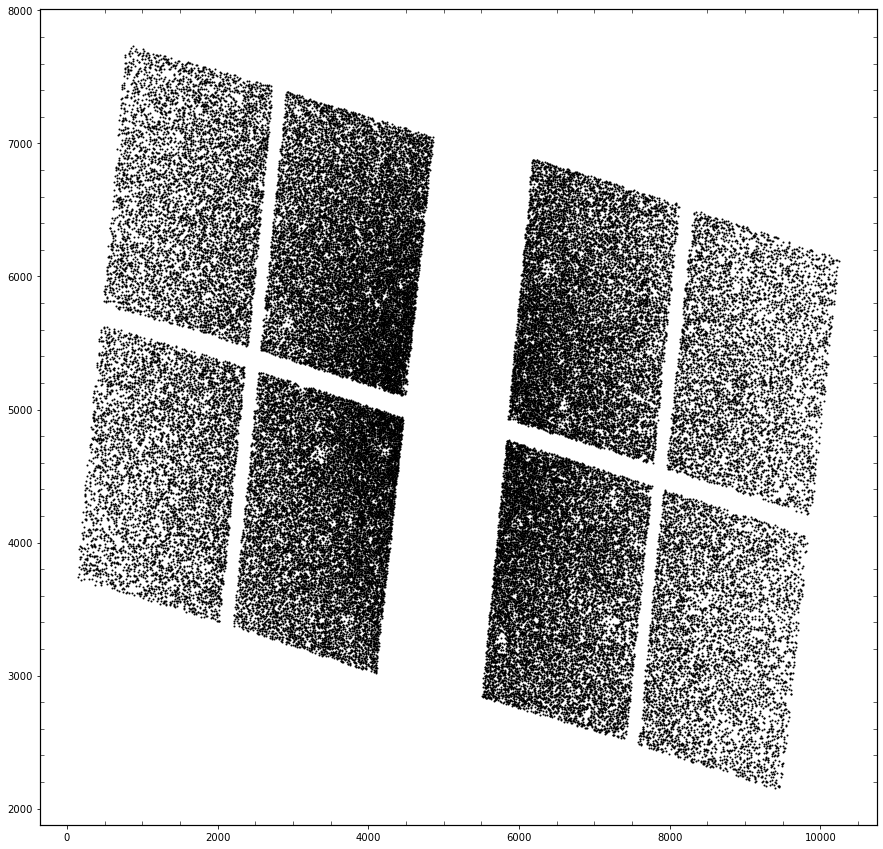

In [36]:
# Your Code
fig, ax = plt.subplots(figsize = (15, 15))
ax.minorticks_on()
ax.tick_params(which = 'minor', length = 4, direction = 'in', top = True, right = True)

mask = (F090W['xbar'] > 0) & (F150W['xbar'] > 0) & (F090W['msig'] < 9) & (F150W['msig'] < 9)
plt.scatter(F090W['xbar'][mask], F090W['ybar'][mask], s = 1, color = 'black')

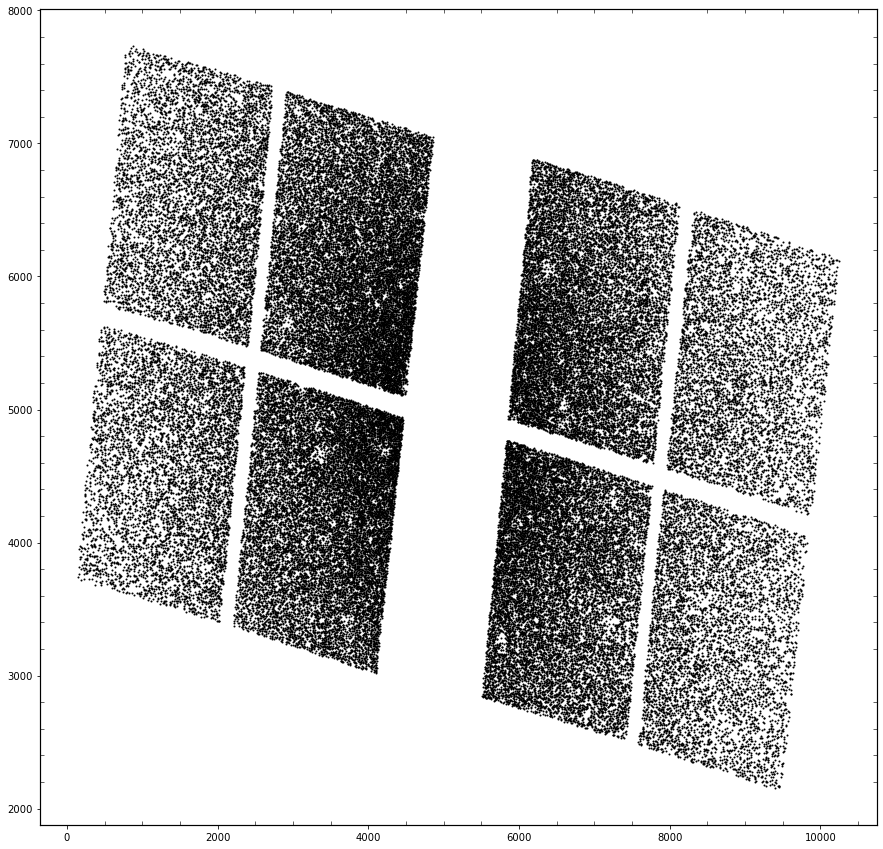

In [37]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.minorticks_on()
ax.tick_params(which = 'minor', length = 4, direction = 'in', top = True, right = True)

plt.scatter(F150W['xbar'][mask], F150W['ybar'][mask], s = 1, color = 'black')

In [6]:
CMD = F090W['mbar'][mask]-F150W['mbar'][mask]

Text(0.5, 1.0, 'M92 CMD')

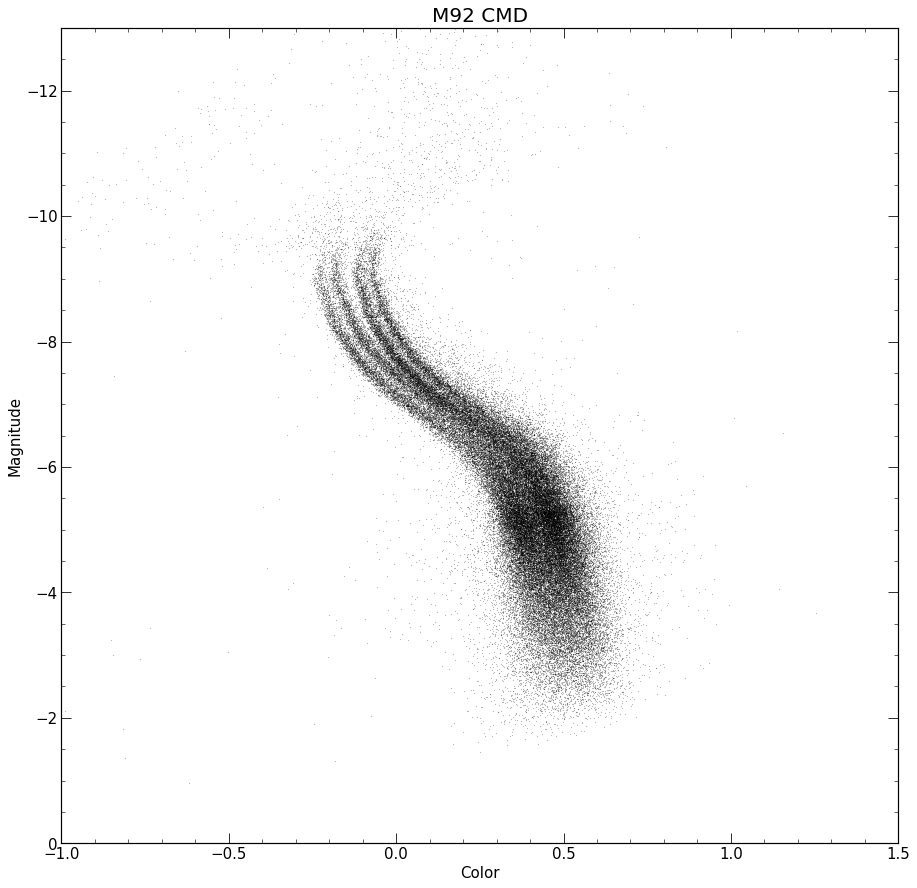

In [38]:
#Plot parameters
fig, ax = plt.subplots(figsize = (15, 15))

ax.minorticks_on()
ax.tick_params(which = 'minor', length = 4, direction = 'in', top = True, right = True)

ax.tick_params(top = True, right = True, size = 10, labelsize = 15)
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.rcParams['axes.linewidth'] = 1.2
plt.xlim(-1,1.5)
plt.ylim(-13, 0)
#Plot
plt.scatter(CMD, F150W['mbar'][mask], s = .01, color = 'black')
plt.gca().invert_yaxis()
plt.xlabel('Color', size = 15)
plt.ylabel('Magnitude', size = 15)
plt.title('M92 CMD', size = 20)

## Question 2b

Take a close look at you CMD.   How does this compare to your expectation of a globular cluster CMD?

# Your comments on the CMD
The main sequence splits off into 4 strands, which indicates that the zero points are off

## Question 3

Let's test the hypothesis that the chip-to-chip photometric calibration is incorrect.   To do this, we want to color-code the CMD by what CCD chip a star landed on.   

But as part of the data reduction, the chip number was not determined, ugh!  We need to figure this out ourselves.

1.  Determine the x/y zones for each CCD chip in the JWST NIRCAM catalogs.   
2.  Remake the plots from Question #2, this time color-coding by each of the 8 CCD regions.

> Hint:  Interactive plotting allows you to read off x/y positions by hovering over a plot.  Consider using this to determine the slope/intercepts defining lines between the CCDs.   To enter interactive mode, `%matplotlib notebook`.  To leave interactive mode, type `%matplotlib inline`

Each set of 4 CCDs represents either the 'A' or 'B' detector.   The order of chips can be found on the [JWST NIRCAM  detector page](https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-instrumentation/nircam-detector-overview) Figure 1.

**For the M92 data, the upper left CCD is `B2`**

In [8]:
#Create CCD reference lines
x1 = np.arange(2100,2900,1)
y1 = 5.7225352112676 * x1 - 8796
x2 = np.arange(7350,8350,1)
y2 = 5.1125 * x2 - 35680.375
x3 = np.arange(0,4700,1)
y3 = -0.16752843846949 * x3 + 5793.6608066184
x4 = np.arange(5600,10100,1)
y4 = -0.16752843846949 * x4 + 5793.6608066184
x5 = np.arange(4600,5500,1)
y5 = 5.7225352112676 * x5 - 24000

In [9]:
#Mask CCD detectors
B1 = (5.7225352112676*F090W['xbar'] - 8796 < F090W['ybar']) & (-0.16752843846949*F090W['xbar'] + 5793.6608066184 > F090W['ybar'])
B2 = (5.7225352112676*F090W['xbar'] - 8796 < F090W['ybar']) & (-0.16752843846949*F090W['xbar'] + 5793.6608066184 < F090W['ybar'])
B3 = (5.7225352112676*F090W['xbar'] - 8796 > F090W['ybar']) & (5.7225352112676*F090W['xbar'] - 24000 < F090W['ybar']) & (-0.16752843846949*F090W['xbar'] + 5793.6608066184 > F090W['ybar'])
B4 = (5.7225352112676*F090W['xbar'] - 8796 > F090W['ybar']) & (5.7225352112676*F090W['xbar'] - 24000 < F090W['ybar']) & (-0.16752843846949*F090W['xbar'] + 5793.6608066184 < F090W['ybar'])

A1 = (5.1125*F090W['xbar'] - 35680.375 > F090W['ybar']) & (-0.16752843846949*F090W['xbar'] + 5793.6608066184 < F090W['ybar'])
A2 = (5.1125*F090W['xbar'] - 35680.375 > F090W['ybar']) & (-0.16752843846949*F090W['xbar'] + 5793.6608066184 > F090W['ybar'])
A3 = (5.1125*F090W['xbar'] - 35680.375 < F090W['ybar']) & (5.7225352112676*F090W['xbar'] - 24000 > F090W['ybar']) & (-0.16752843846949*F090W['xbar'] + 5793.6608066184 < F090W['ybar'])
A4 = (5.1125*F090W['xbar'] - 35680.375 < F090W['ybar']) & (5.7225352112676*F090W['xbar'] - 24000 > F090W['ybar']) & (-0.16752843846949*F090W['xbar'] + 5793.6608066184 > F090W['ybar'])


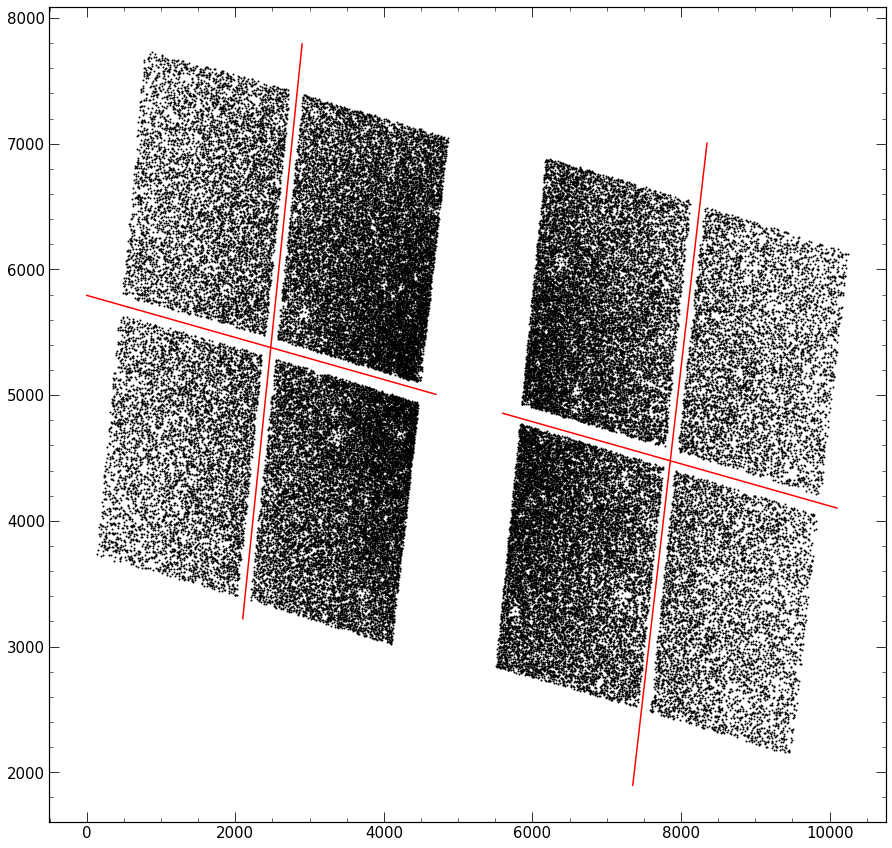

In [39]:
# Exit interactive mode
%matplotlib inline

fig, ax = plt.subplots(figsize = (15, 15))

ax.minorticks_on()
ax.tick_params(which = 'minor', length = 4, direction = 'in', top = True, right = True)

ax.tick_params(top = True, right = True, size = 10, labelsize = 15)
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.rcParams['axes.linewidth'] = 1.2
mask = (F090W['xbar'] > 0) & (F150W['xbar'] > 0) & (F090W['msig'] < 9) & (F150W['msig'] < 9)
plt.scatter(F090W['xbar'][mask], F090W['ybar'][mask], s = 1, color = 'black')


plt.plot(x1,y1, color = 'r')
plt.plot(x2,y2, color = 'r')
plt.plot(x3,y3, color = 'r')
plt.plot(x4,y4, color = 'r')

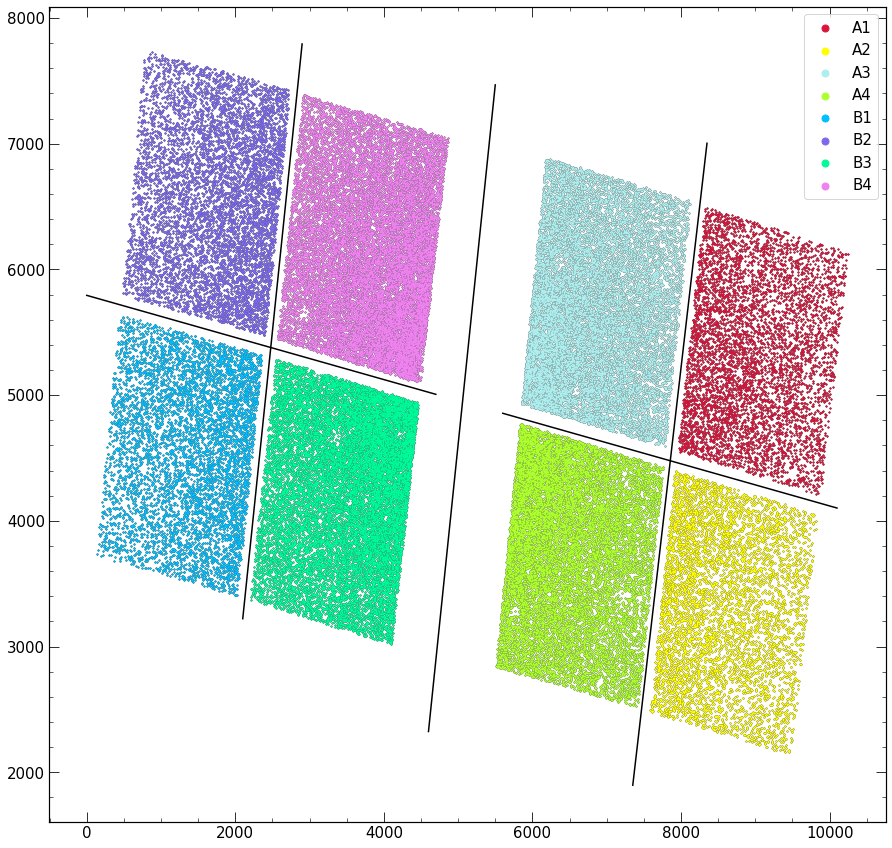

In [40]:
#Your code
fig, ax = plt.subplots(figsize = (15, 15))

ax.minorticks_on()
ax.tick_params(which = 'minor', length = 4, direction = 'in', top = True, right = True)

ax.tick_params(top = True, right = True, size = 10, labelsize = 15)
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.rcParams['axes.linewidth'] = 1.2
mask = (F090W['xbar'] > 0) & (F150W['xbar'] > 0) & (F090W['msig'] < 9) & (F150W['msig'] < 9)
plt.scatter(F090W['xbar'][mask], F090W['ybar'][mask], s = 1, color = 'black')

plt.scatter(F090W['xbar'][A1 & mask], F090W['ybar'][A1 & mask], color = 'crimson', s = 1, label = 'A1')
plt.scatter(F090W['xbar'][A2 & mask], F090W['ybar'][A2 & mask], color = 'yellow', s = 1, label = 'A2')
plt.scatter(F090W['xbar'][A3 & mask], F090W['ybar'][A3 & mask], color = 'paleturquoise', s = 1, label = 'A3')
plt.scatter(F090W['xbar'][A4 & mask], F090W['ybar'][A4 & mask], color = 'greenyellow', s = 1, label = 'A4')
plt.scatter(F090W['xbar'][B1 & mask], F090W['ybar'][B1 & mask], color = 'deepskyblue', s = 1, label = 'B1')
plt.scatter(F090W['xbar'][B2 & mask], F090W['ybar'][B2 & mask], color = 'mediumslateblue', s = 1, label = 'B2')
plt.scatter(F090W['xbar'][B3 & mask], F090W['ybar'][B3 & mask], color = 'mediumspringgreen', s = 1, label = 'B3')
plt.scatter(F090W['xbar'][B4 & mask], F090W['ybar'][B4 & mask], color = 'violet', s = 1, label = 'B4')


plt.plot(x1,y1, color = "black")
plt.plot(x2,y2, color = 'black')
plt.plot(x3,y3, color = 'black')
plt.plot(x4,y4, color = 'black')
plt.plot(x5,y5, color = 'black')
plt.legend(prop={'family': 'sans serif', 'size': 15}, markerscale = 7)

## Question 4:

Hooray!   We have chip regions defined.   Now re-plot CMD with each CCD as a different color.

In [12]:
# Your Code
#CMD A
CMDA1 = F090W['mbar'][A1 & mask]-F150W['mbar'][A1 & mask]
CMDA2 = F090W['mbar'][A2 & mask]-F150W['mbar'][A2 & mask]
CMDA3 = F090W['mbar'][A3 & mask]-F150W['mbar'][A3 & mask]
CMDA4 = F090W['mbar'][A4 & mask]-F150W['mbar'][A4 & mask]
#CMD B
CMDB1 = F090W['mbar'][B1 & mask]-F150W['mbar'][B1 & mask]
CMDB2 = F090W['mbar'][B2 & mask]-F150W['mbar'][B2 & mask]
CMDB3 = F090W['mbar'][B3 & mask]-F150W['mbar'][B3 & mask]
CMDB4 = F090W['mbar'][B4 & mask]-F150W['mbar'][B4 & mask]


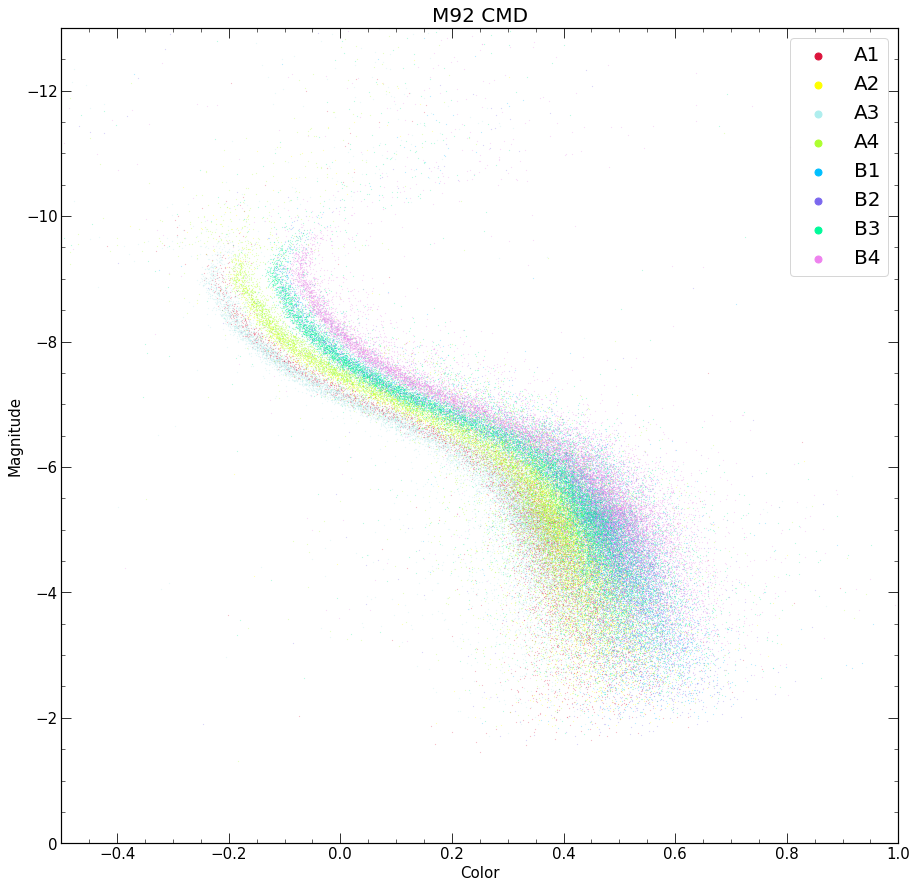

In [41]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.minorticks_on()
ax.tick_params(which = 'minor', length = 4, direction = 'in', top = True, right = True)

ax.tick_params(top = True, right = True, size = 10, labelsize = 15)
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.rcParams['axes.linewidth'] = 1.2
plt.xlim(-.5,1)
plt.ylim(-13, 0)
#Plot
plt.scatter(CMDA1, F150W['mbar'][A1 & mask], s = .01, color = 'crimson', label = ("A1"))
plt.scatter(CMDA2, F150W['mbar'][A2 & mask], s = .01, color = 'yellow', label = ("A2"))
plt.scatter(CMDA3, F150W['mbar'][A3 & mask], s = .01, color = 'paleturquoise', label = ("A3"))
plt.scatter(CMDA4, F150W['mbar'][A4 & mask], s = .01, color = 'greenyellow', label = ("A4"))

plt.scatter(CMDB1, F150W['mbar'][B1 & mask], s = .01, color = 'deepskyblue', label = ("B1"))
plt.scatter(CMDB2, F150W['mbar'][B2 & mask], s = .01, color = 'mediumslateblue', label = ("B2"))
plt.scatter(CMDB3, F150W['mbar'][B3 & mask], s = .01, color = 'mediumspringgreen', label = ("B3"))
plt.scatter(CMDB4, F150W['mbar'][B4 & mask], s = .01, color = 'violet', label = ("B4"))

plt.gca().invert_yaxis()
plt.xlabel('Color', size = 15)
plt.ylabel('Magnitude', size = 15)
plt.title('M92 CMD', size = 20)
plt.legend(loc = "upper right", prop={'family': 'sans serif', 'size': 20}, markerscale = 70)

## Question 5

Yep, the CMD shifts are definitely due to offsets in the relative calibration across the NIRCAM CCDs.  We will next estimate these shifts and correct the CMD.  As a first attempt, we will assume the shift is in color (x-shift) only: 
1.  Chose a slice in magnitude space where the CCD differences are most obvious.
2.  Using the B1 CCD as reference, determine the color shift needed to align each CCD.
3.  Plot the corrected CMD, color-coded again by CCD.
4.  Output/print the color shifts in an easy to understand format


In [14]:
slicemaskA1 = (F150W['mbar'][A1 & mask] > -9) & (F150W['mbar'][A1 & mask] < -8)
slicemaskA2 = (F150W['mbar'][A2 & mask] > -9) & (F150W['mbar'][A2 & mask] < -8)
slicemaskA3 = (F150W['mbar'][A3 & mask] > -9) & (F150W['mbar'][A3 & mask] < -8)
slicemaskA4 = (F150W['mbar'][A4 & mask] > -9) & (F150W['mbar'][A4 & mask] < -8)

slicemaskB1 = (F150W['mbar'][B1 & mask] > -9) & (F150W['mbar'][B1 & mask] < -8)
slicemaskB2 = (F150W['mbar'][B2 & mask] > -9) & (F150W['mbar'][B2 & mask] < -8)
slicemaskB3 = (F150W['mbar'][B3 & mask] > -9) & (F150W['mbar'][B3 & mask] < -8)
slicemaskB4 = (F150W['mbar'][B4 & mask] > -9) & (F150W['mbar'][B4 & mask] < -8)
np.size(slicemaskB2)

6910

In [15]:
newarrayA1 = F150W['mbar'][A1 & mask]
newarrayA2 = F150W['mbar'][A2 & mask]
newarrayA3 = F150W['mbar'][A3 & mask]
newarrayA4 = F150W['mbar'][A4 & mask]

newarrayB1 = F150W['mbar'][B1 & mask]
newarrayB2 = F150W['mbar'][B2 & mask]
newarrayB3 = F150W['mbar'][B3 & mask]
newarrayB4 = F150W['mbar'][B4 & mask]
np.size(newarrayB2)

6910

In [16]:
graphmaskA1 = newarrayA1[slicemaskA1]
graphmaskA2 = newarrayA2[slicemaskA2]
graphmaskA3 = newarrayA3[slicemaskA3]
graphmaskA4 = newarrayA4[slicemaskA4]

graphmaskB1 = newarrayB1[slicemaskB1]
graphmaskB2 = newarrayB2[slicemaskB2]
graphmaskB3 = newarrayB3[slicemaskB3]
graphmaskB4 = newarrayB4[slicemaskB4]


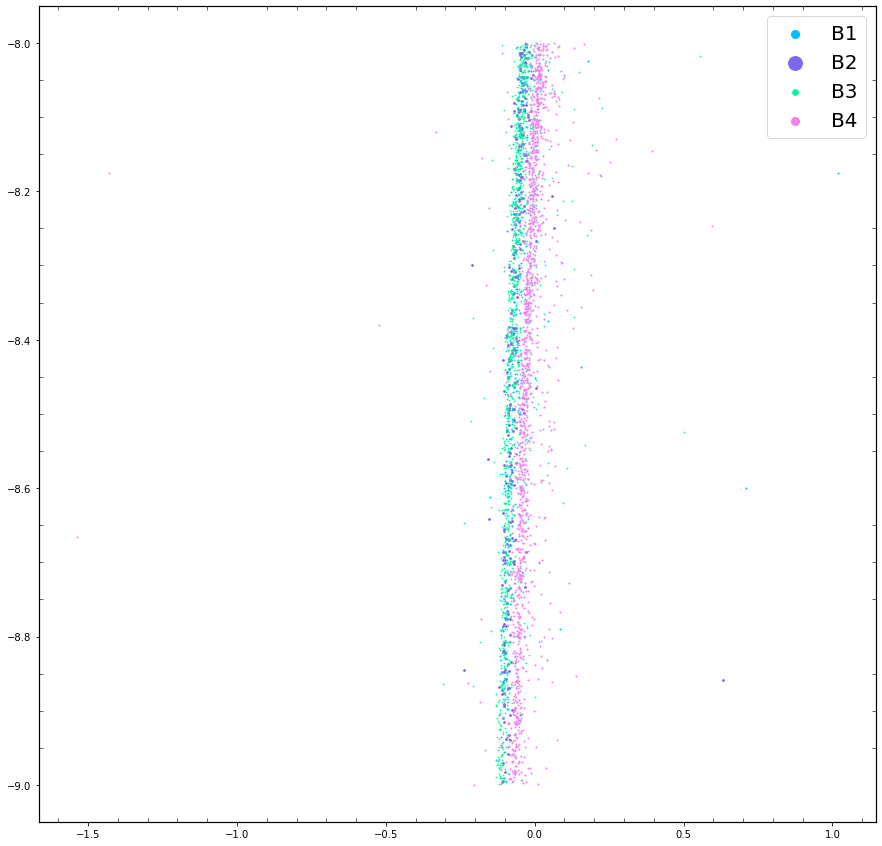

In [42]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.minorticks_on()
ax.tick_params(which = 'minor', length = 4, direction = 'in', top = True, right = True)

plt.scatter(CMDB1[slicemaskB1], graphmaskB1, s = 1, color = 'deepskyblue', label = ("B1"))
plt.scatter(CMDB2[slicemaskB2], graphmaskB2, s = 3, color = 'mediumslateblue', label = ("B2"))
plt.scatter(CMDB3[slicemaskB3], graphmaskB3, s = .5, color = 'mediumspringgreen', label = ("B3"))
plt.scatter(CMDB4[slicemaskB4], graphmaskB4, s = 1, color = 'violet', label = ("B4"))
plt.legend(prop={'family': 'sans serif', 'size': 20}, markerscale = 8)

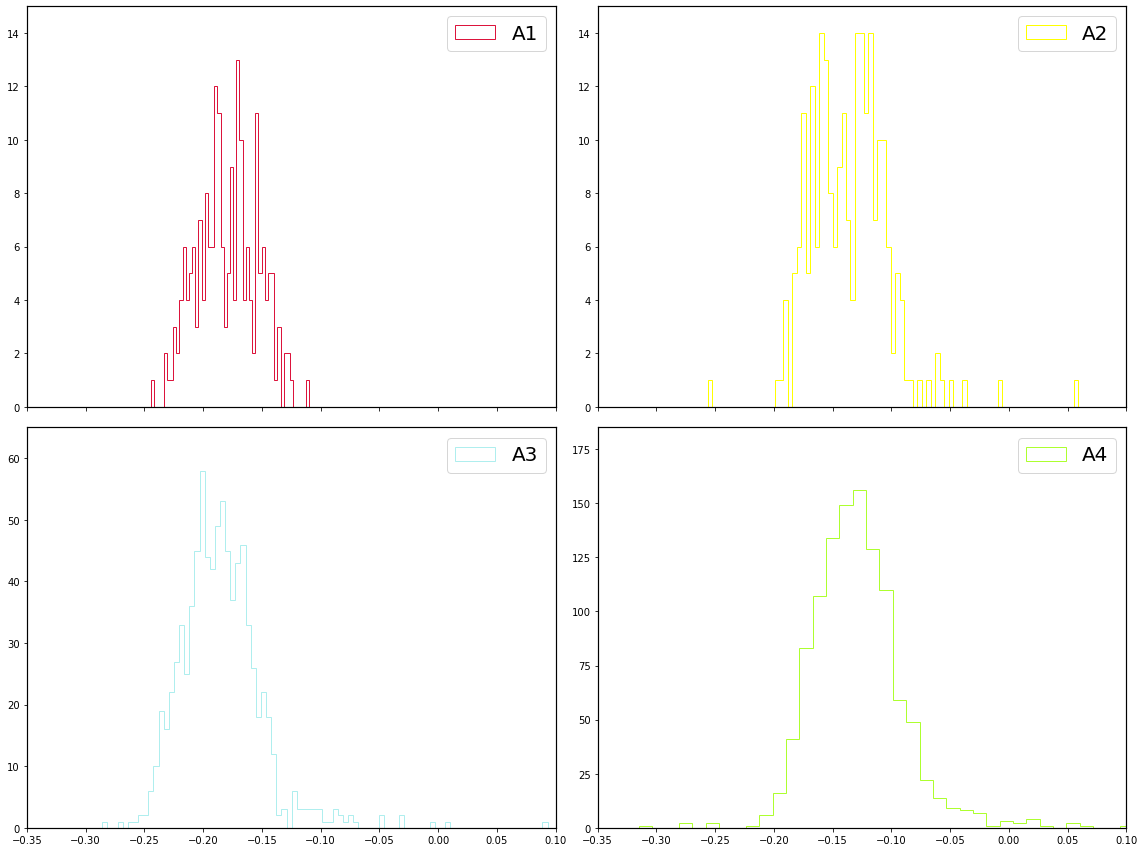

In [18]:
#A1-A4
fig, axs = plt.subplots(2, 2, sharex = True, sharey = False, figsize=(16, 12))
fig.tight_layout()

axs[0,0].hist(CMDA1[slicemaskA1].flatten(), histtype = "step", bins = 50, label = 'A1', color = 'crimson')
axs[0,1].hist(CMDA2[slicemaskA2].flatten(), histtype = "step", bins = 100, label = 'A2', color = 'yellow')
axs[1,0].hist(CMDA3[slicemaskA3].flatten(), histtype = "step", bins = 200, label = 'A3', color = 'paleturquoise')
axs[1,1].hist(CMDA4[slicemaskA4].flatten(), histtype = "step", bins = 200, label = 'A4', color = 'greenyellow')
#A1
axs[0,0].set_xlim([-.35, .1])
axs[0,0].set_ylim([0, 15])
axs[0,0].legend(prop={'family': 'sans serif', 'size': 20})
#A2
axs[0,1].set_ylim([0, 15])
axs[0,1].legend(loc = 'upper right', prop={'family': 'sans serif', 'size': 20})
#A3
axs[1,0].set_ylim([0, 65])
axs[1,0].legend(prop={'family': 'sans serif', 'size': 20})
#A4
axs[1,1].set_ylim([0, 185])
axs[1,1].legend(prop={'family': 'sans serif', 'size': 20})


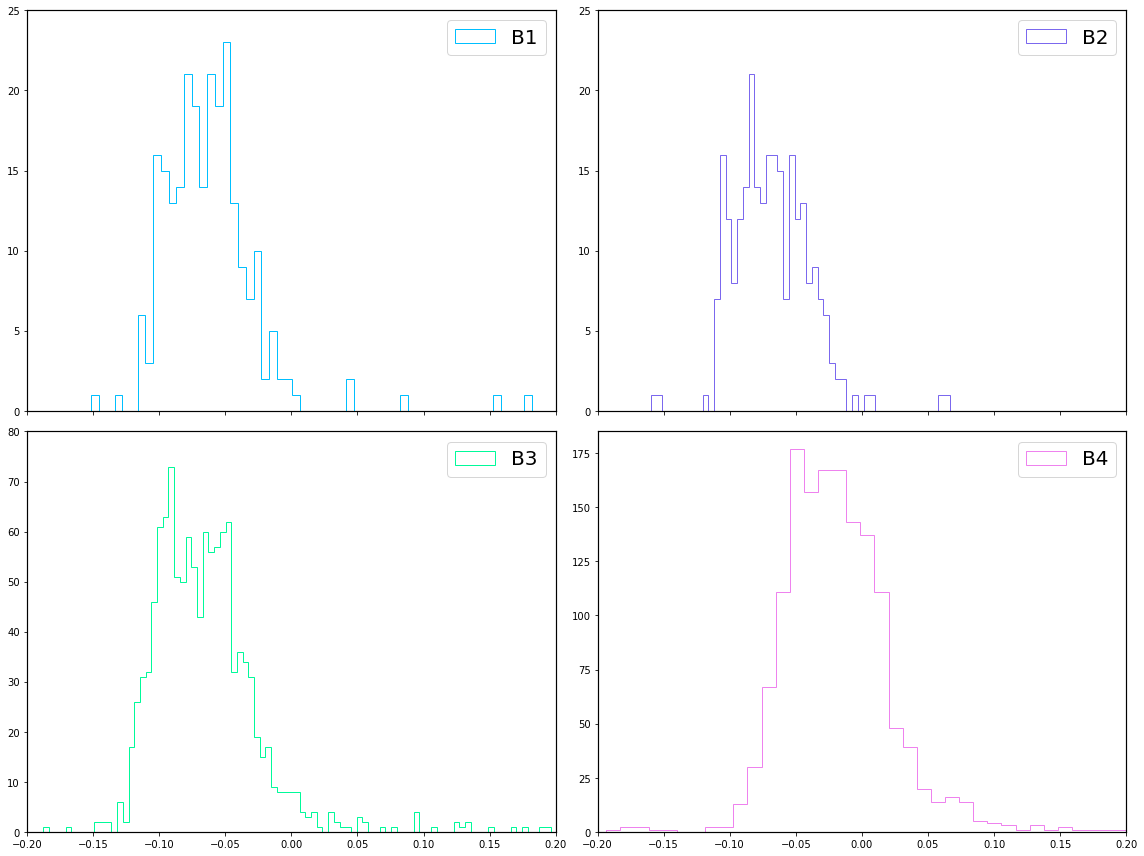

In [19]:
#B1-B4
fig, axs = plt.subplots(2, 2, sharex = True, sharey = False, figsize=(16, 12))
fig.tight_layout()

axs[0,0].hist(CMDB1[slicemaskB1].flatten(), histtype = "step", bins = 200, label = 'B1', color = 'deepskyblue')
axs[0,1].hist(CMDB2[slicemaskB2].flatten(), histtype = "step", bins = 200, label = 'B2', color = 'mediumslateblue')
axs[1,0].hist(CMDB3[slicemaskB3].flatten(), histtype = "step", bins = 200, label = 'B3', color = 'mediumspringgreen')
axs[1,1].hist(CMDB4[slicemaskB4].flatten(), histtype = "step", bins = 200, label = 'B4', color = 'violet')
#B1
axs[0,0].set_xlim([-.2, .2])
axs[0,0].set_ylim([0, 25])
axs[0,0].legend(prop={'family': 'sans serif', 'size': 20})
#B2
axs[0,1].set_ylim([0, 25])
axs[0,1].legend(prop={'family': 'sans serif', 'size': 20})
#B3
axs[1,0].set_ylim([0, 80])
axs[1,0].legend(prop={'family': 'sans serif', 'size': 20})
#B4
axs[1,1].set_ylim([0, 185])
axs[1,1].legend(prop={'family': 'sans serif', 'size': 20})


In [21]:
#A Chip median
medianA = (np.median(CMDA1[slicemaskA1].flatten()), np.median(CMDA2[slicemaskA2].flatten()), np.median(CMDA3[slicemaskA3].flatten()), np.median(CMDA4[slicemaskA4].flatten()))
print(medianA)
#B Chip median
medianB = (np.median(CMDB1[slicemaskB1].flatten()), np.median(CMDB2[slicemaskB2].flatten()), np.median(CMDB3[slicemaskB3].flatten()), np.median(CMDB4[slicemaskB4].flatten()))
print(medianB)


(-0.17914999999999903, -0.13819999999999943, -0.18759999999999977, -0.13124999999999964)
(-0.06419999999999959, -0.06975000000000087, -0.06955000000000044, -0.022550000000000736)


In [23]:
#Function to calculate difference with respect to B1
def diff(histogram):
    medianB1 = np.median(CMDB1[slicemaskB1].flatten())
    newhistogram = medianB1 - histogram
    return newhistogram

In [27]:
#Calculate differences
for i in medianA:
    difA = diff(i)
    print(difA)
    
for i in medianB:
    difB = diff(i)
    print(difB)

0.11494999999999944
0.07399999999999984
0.12340000000000018
0.06705000000000005
0.0
0.005550000000001276
0.005350000000000854
-0.041649999999998855


In [28]:
#Scale:
CMDA1s = CMDA1 + 0.11494999999999944
CMDA2s = CMDA2 + 0.07399999999999984
CMDA3s = CMDA3 + 0.12340000000000018
CMDA4s = CMDA4 + 0.06705000000000005

CMDB2s = CMDB2 + 0.005550000000001276
CMDB3s = CMDB3 + 0.005350000000000854
CMDB4s = CMDB4 - 0.041649999999998855

Text(0, 0.5, 'Magnitude')

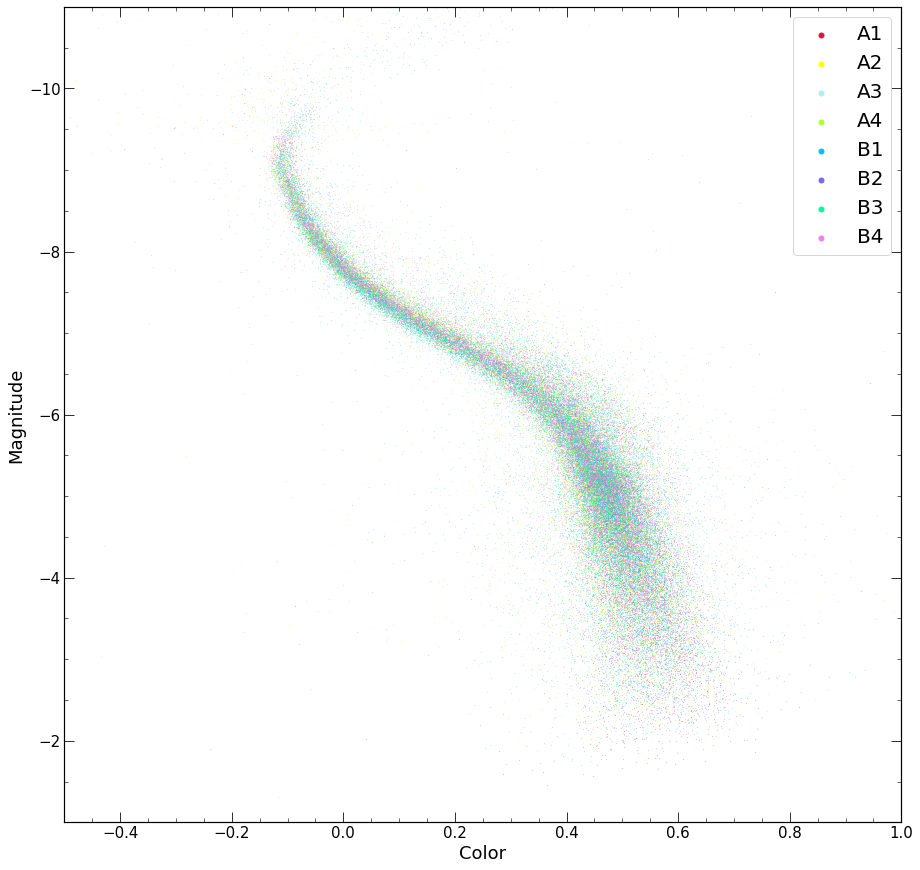

In [43]:
#Replot
fig, ax = plt.subplots(figsize = (15, 15))
ax.minorticks_on()
ax.tick_params(which = 'minor', length = 4, direction = 'in', top = True, right = True)

ax.tick_params(top = True, right = True, size = 10, labelsize = 15)
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")

plt.rcParams['axes.linewidth'] = 1.2



plt.scatter(CMDA1s, F150W['mbar'][A1 & mask], s = .01, color = 'crimson', label = ("A1"))
plt.scatter(CMDA2s, F150W['mbar'][A2 & mask], s = .01, color = 'yellow', label = ("A2"))
plt.scatter(CMDA3s, F150W['mbar'][A3 & mask], s = .01, color = 'paleturquoise', label = ("A3"))
plt.scatter(CMDA4s, F150W['mbar'][A4 & mask], s = .01, color = 'greenyellow', label = ("A4"))

plt.scatter(CMDB1, F150W['mbar'][B1 & mask], s = .01, color = 'deepskyblue', label = ("B1"))
plt.scatter(CMDB2s, F150W['mbar'][B2 & mask], s = .01, color = 'mediumslateblue', label = ("B2"))
plt.scatter(CMDB3s, F150W['mbar'][B3 & mask], s = .01, color = 'mediumspringgreen', label = ("B3"))
plt.scatter(CMDB4s, F150W['mbar'][B4 & mask], s = .01, color = 'violet', label = ("B4"))

plt.gca().invert_yaxis()
plt.legend(loc = 'upper right', prop={'family': 'sans serif', 'size': 20}, markerscale = 50)
plt.xlim(-.5,1)
plt.ylim(-1,-11)
plt.xlabel('Color', size = 18)
plt.ylabel('Magnitude', size = 18)

## Question 5 - Extra Credit

Above, we assumed the zeropoint shifts were in color-only and used only part of the data.   Update your analysis to find shifts in both directions using more of the dataset.   From the Boyer et al Research Note, one method is to use a kernal density estimator (`scipy.stats.gaussian_kde`), but you can use any method you'd like.  Repeat steps 2-4 above.



In [20]:
# Your Code optionally

## Question 6

Now that you've determine the photometric zeropoints, you would probably want to use them to do some great science.    To that end, write a script (.py file) that you can import into a notebook that applies these shifts in a single line.   The script should take in just the photometry and output corrected photometry, with optional plotting.

1.  Write a script which takes as input the JWST photometry and outputs the corrected photometry
2.  Your script should optionally plot the uncorrected and corrected CMD side-by-side for easy comparison and the chip names shown in a legend.  Label all axes.
3.  Compare to your corrected CMD to the plot in the [Boyer et al Research Note](https://ui.adsabs.harvard.edu/abs/2022RNAAS...6..191B/abstract).

> Note:  This is a typical mode that many astronomers use:   develop and explore ideas in a Notebook, then move this work into a script (.py file) which can be imported into a notebook for future use.

In [1]:
# this question is answered in zeropoints.py 

##  JWST Zeropoints:   A Happy Conclusion

After the August 2022 hackday, we wrote and published a Research Note,   [Boyer et al](https://ui.adsabs.harvard.edu/abs/2022RNAAS...6..191B/abstract), providing updated zeropoints.   At the same time, others noticed this problem and determine [zeropoints separately](https://github.com/gbrammer/grizli/pull/107).   STScI [quickly updated](https://www.stsci.edu/contents/news/jwst/2022/an-improved-nircam-flux-calibration-is-now-available) the NIRCAM data reduction pipeline with the M92 zeropoints, and has since refined these numbers with additional data.   Our Stellar Population ERS team [recently published](https://ui.adsabs.harvard.edu/abs/2023arXiv230104659W/abstract) the first survey paper, with several more science papers due out soon.  While some of the earliest discovery papers are [no longer valid](https://www.nature.com/articles/d41586-022-03059-y), JWST is performing better than expect and will likely produce [amazing science](https://www.nasa.gov/content/goddard/webb-telescope-image-galleries-from-nasa) for many years to come!  